<a href="https://colab.research.google.com/github/niehues/pca_intro/blob/master/Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to basic visualizations of multidimensional data

**Topics**
* scatter plots
* heatmaps 
* data normalization
* PCA

## Loading a data set

We here use the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) as example data to illustrate different visualizations. The data set can be loaded into Python using the [scikit-learn](https://scikit-learn.org/stable/) machine learning library. Summary information on the data set is available and can be printed. The data contains 30 real-valued features for 569 samples. The features describe characteristics of cell nuclei present in images of fine needle aspiration biopsies of breast masses. Additionally, the data set contains information on whether the breast tumors were diagnosed as malignant or benign.

In [1]:
from sklearn import datasets
# load the example data set
data = datasets.load_breast_cancer()
# print summary information
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In the next step, we will convert the loaded data to a [pandas](https://pandas.pydata.org/) DataFrame object. The data frame contains samples in rows and features in columns. This is one option to work with the tabular data and will make it easy for us to process the data and create plots.

In [2]:
import pandas as pd
# convert data to pandas DataFrame
df = pd.DataFrame(data.data, columns = data.feature_names)
# print DataFrame object
print(df)

     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]


The loaded data set provides information on the breast tumor diagnosis coded as 0 and 1. We create a one-dimensional array with the diagnosis of all samples using more human readable values 'malignant' and 'benign'.

In [3]:
# diagnosis for all samples is coded as 0 and 1 in data.target
# the names to which 0 and 1 correspond are stored in data.target_names
# create an array with diagnosis names of all samples
diagnosis = pd.Series([data.target_names[_] for _ in data.target],
                      dtype = "category")
# print summary
print(diagnosis.describe())

count        569
unique         2
top       benign
freq         357
dtype: object


## Two-dimensional scatter plots

Let's plot different features against each other. Look above at the output of [the cell where we loaded the data set](https://colab.research.google.com/drive/1ffb8ugK3ruYC24_sBkR43ENRP1DaahPI#scrollTo=b8OA2MiYJT22&line=4&uniqifier=1) to see a list of all features. 

To select a few features for plotting, we can first look at the correlation matrix. Some features are more correlated than others. For example, 'mean radius' and 'mean perimeter' are highly correlated, while 'mean radius' and 'mean texture' are less correlated.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


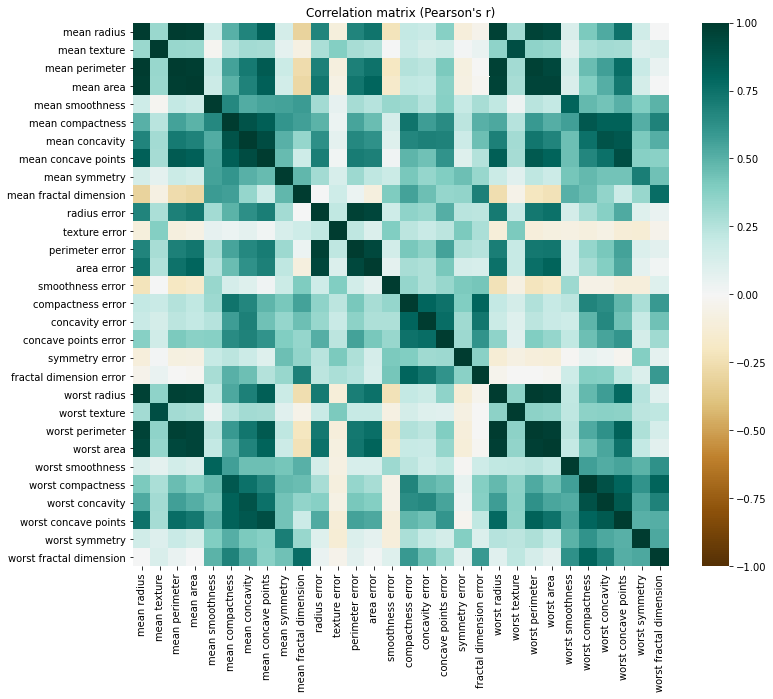

In [4]:
# feature correlation matrix heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(method = "pearson"), vmin = -1, vmax = 1, cmap = "BrBG")
plt.title("Correlation matrix (Pearson's r)")
plt.show()

In [0]:
# define function for scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

def plot_joint_scatter(df, x, y, diagnosis, diag_values):
    # new plot
    plt.figure()
    jointplot_2d = sns.JointGrid(x = x, y = y, data = df)
    # scatter plot
    jointplot_2d = jointplot_2d.plot_joint(
        sns.scatterplot, hue = diagnosis, style = diagnosis)
    # # regression line
    # jointplot_2d = jointplot_2d.plot_joint(
    #     sns.regplot, color = "k", 
    #     scatter_kws = {"alpha" : 0.0}, line_kws = {"linewidth": 1},
    #     label = "linear regression")
    # plot distributions
    for d in diag_values:
        sns.distplot(df.loc[diagnosis == d, x], ax = jointplot_2d.ax_marg_x)
        sns.distplot(df.loc[diagnosis == d, y], ax = jointplot_2d.ax_marg_y, 
                    vertical = True)
    plt.show()

<Figure size 432x288 with 0 Axes>

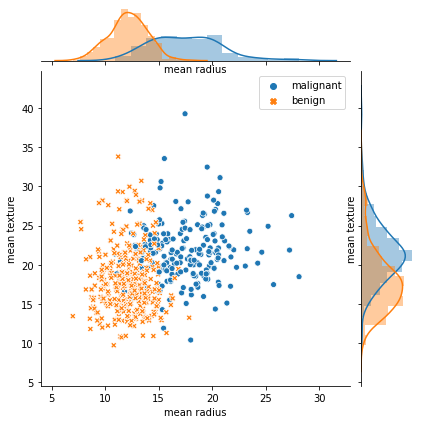

<Figure size 432x288 with 0 Axes>

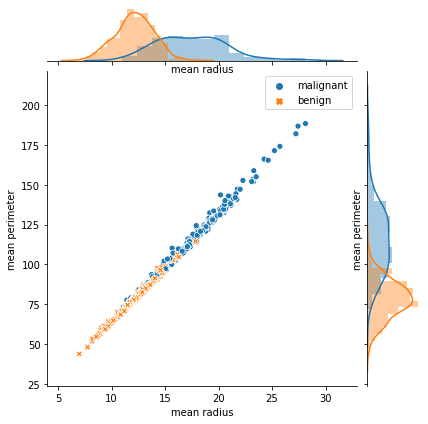

<Figure size 432x288 with 0 Axes>

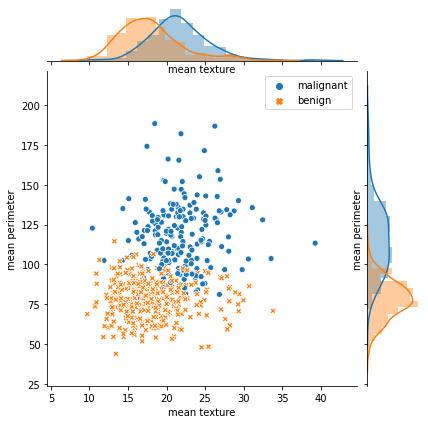

In [6]:
# plot scatter plots
features_to_plot = ("mean radius", "mean texture", "mean perimeter")
import itertools
for x, y in itertools.combinations(features_to_plot, 2):
    plot_joint_scatter(df, x, y, diagnosis, data.target_names)

Plot different features against each other by changing x and y in the above code. Which features seem to be correlated?

        mean radius  mean texture  ...  worst symmetry  worst fractal dimension
count  5.690000e+02  5.690000e+02  ...    5.690000e+02             5.690000e+02
mean  -3.162867e-15 -6.530609e-15  ...   -2.289567e-15             2.575171e-15
std    1.000880e+00  1.000880e+00  ...    1.000880e+00             1.000880e+00
min   -2.029648e+00 -2.229249e+00  ...   -2.160960e+00            -1.601839e+00
25%   -6.893853e-01 -7.259631e-01  ...   -6.418637e-01            -6.919118e-01
50%   -2.150816e-01 -1.046362e-01  ...   -1.274095e-01            -2.164441e-01
75%    4.693926e-01  5.841756e-01  ...    4.501382e-01             4.507624e-01
max    3.971288e+00  4.651889e+00  ...    6.046041e+00             6.846856e+00

[8 rows x 30 columns]


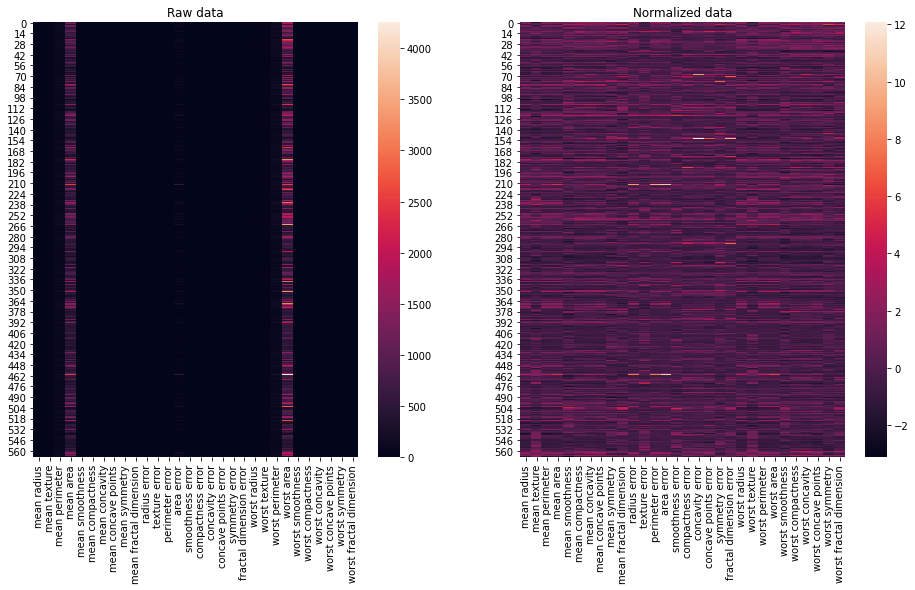

In [7]:
# normalize data (mean centering and scaling to unit-variance)
from sklearn import preprocessing
scaler = preprocessing.StandardScaler(with_mean = True, with_std = True)
df_normalized =  pd.DataFrame(scaler.fit_transform(df), 
                              index = df.index, columns = df.columns)
print(df_normalized.describe())
fig, axes = plt.subplots(1, 2, figsize = (16, 8))
sns.heatmap(df, ax = axes[0])
sns.heatmap(df_normalized, ax = axes[1])
axes[0].set_title("Raw data")
axes[1].set_title("Normalized data")
plt.show()

In [0]:
# define function for PCA with two variables only
import numpy as np
from sklearn import decomposition

def plot_pca_two_vars(df, x, y, diagnosis, title):
    fig, axes = plt.subplots(1, 2, figsize = (12, 5.5))
    # scatterplot of two features
    sns.scatterplot(
        x = x, y = y, data = df,
        hue = diagnosis, style = diagnosis, ax = axes[0])
    # PCA of two features
    pca = decomposition.PCA(n_components = 2)
    transformed = pca.fit_transform(df.loc[:,(x,y)]) # two columns only
    # # variance explained by principal components
    # print("Explained variance:", pca.explained_variance_ratio_)
    # plot scores
    sns.scatterplot(
        x = transformed[:,0], y = transformed[:,1], # PC1, PC2
        hue = diagnosis, style = diagnosis, ax = axes[1])
    # add PCs to scatterplot
    for pc, label in enumerate(("PC 1", "PC 2")):
        axes[0].annotate(
            "", 
            xy = pca.mean_, 
            xytext = pca.mean_ + 3*pca.components_[pc] * np.sqrt(pca.explained_variance_[pc]),
            arrowprops = {"arrowstyle": "<-", 
                          "linewidth": 2, 
                          "shrinkA": 0, 
                          "shrinkB": 0})
        axes[0].text(
            *(pca.mean_ + 3.6*pca.components_[pc] * np.sqrt(pca.explained_variance_[pc])),
            label, color = "k", ha = "center", va = "center")
    # add horizontal and vertical line through origin
    axes[1].axvline(0, c = "k")
    axes[1].axhline(0, c = "k")
    # normalize loadings to size of plot
    miny, maxy = axes[1].get_ylim()
    loadings = pca.components_ / np.amax(pca.components_) * 0.8 * abs(maxy-miny)
    # add loadings
    for idx, var in enumerate((x, y)):
        axes[1].annotate(
            "", (0, 0), (loadings[0, idx], loadings[1, idx]), 
            arrowprops = {"arrowstyle": "<-", 
                          "color": "r",
                          "linewidth": 2, 
                          "shrinkA": 0, 
                          "shrinkB": 0})
        axes[1].text(
            1.1*loadings[0, idx], 1.1*loadings[1, idx],
            var, color = "r", ha = "center", va = "center")
    # set equal dimensions for x and y axis
    axes[0].axis("equal")
    axes[1].axis("equal")
    # add labels and titles
    axes[1].set_xlabel(
        "Principal component 1 ({0:.1%})".format(pca.explained_variance_ratio_[0]))
    axes[1].set_ylabel(
        "Principal component 2 ({0:.1%})".format(pca.explained_variance_ratio_[1]))
    axes[0].set_title("2D scatter plot")
    axes[1].set_title("PCA")
    plt.suptitle(title)
    plt.show()

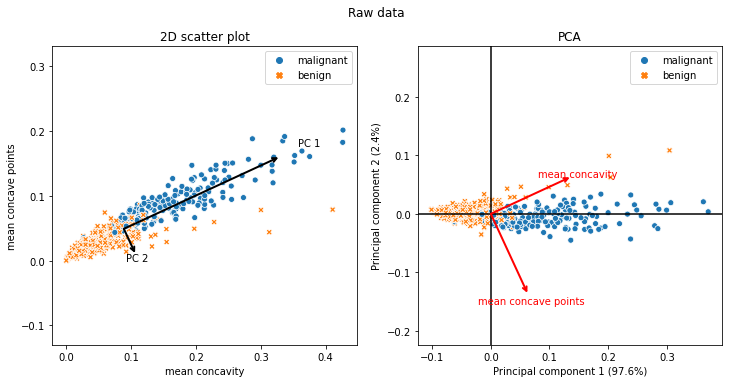

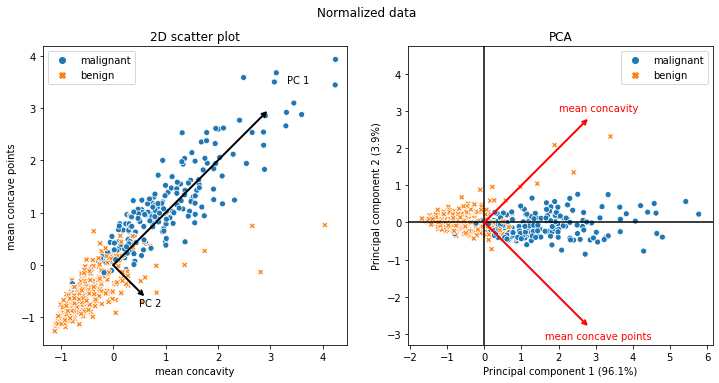

In [13]:
# plot PCA with 2 variables
x, y = "mean concavity", "mean concave points"
plot_pca_two_vars(df, x, y, diagnosis, "Raw data")
plot_pca_two_vars(df_normalized, x, y, diagnosis, "Normalized data")

The measured features have very different scales.

Raw data - explained variance: [0.98204467 0.01617649 0.00155751]
Normalized data - explained variance: [0.44272026 0.18971182 0.09393163]


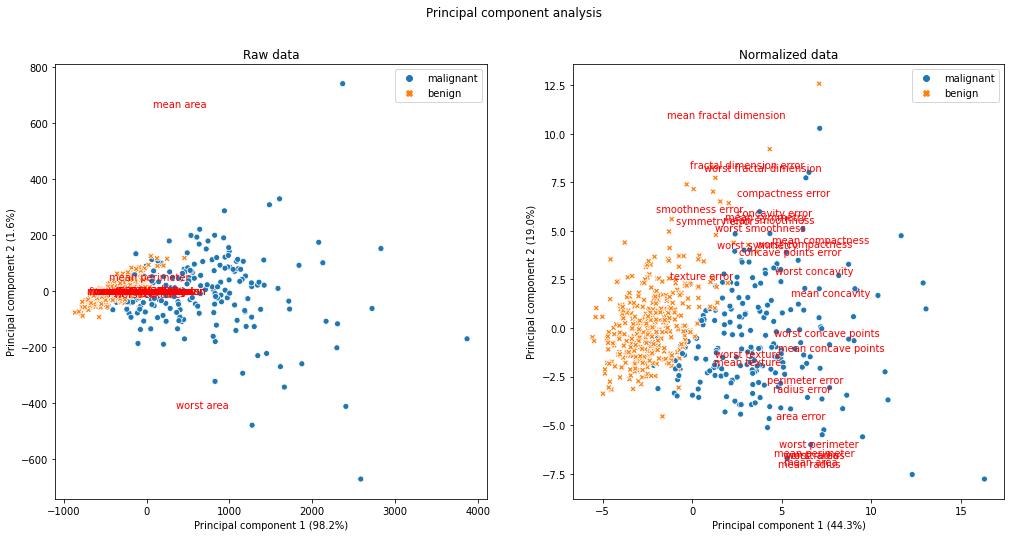

In [16]:
# PCA
from sklearn import decomposition
fig, axes = plt.subplots(1, 2, figsize = (17, 8))
for _df, ax, title in ((df, 0, "Raw data"), 
                       (df_normalized, 1, "Normalized data")):
    pca = decomposition.PCA(n_components = 3)
    transformed = pca.fit_transform(_df)
    # variance explained by principal components
    print(title, "- explained variance:", pca.explained_variance_ratio_)
    sns.scatterplot(
        x = transformed[:,0], # PC1 
        y = transformed[:,1], # PC2
        hue = diagnosis, style = diagnosis, ax = axes[ax])
    # normalize loadings to size of plot
    miny, maxy = axes[ax].get_ylim()
    loadings = pca.components_ / np.amax(pca.components_) *0.5*abs(maxy-miny)
    # add loadings
    for idx, var in enumerate(_df.columns):
        axes[ax].text(
            loadings[0, idx], loadings[1, idx],
            var, color = "r", ha = "center", va = "center")
    axes[ax].set_xlabel(
        "Principal component 1 ({0:.1%})".format(pca.explained_variance_ratio_[0]))
    axes[ax].set_ylabel(
        "Principal component 2 ({0:.1%})".format(pca.explained_variance_ratio_[1]))
    axes[ax].set_title(title)
plt.suptitle("Principal component analysis")
plt.show()


In [0]:
# t-SNE
from sklearn import manifold
tsne = manifold.TSNE(n_components = 2, verbose = 1)
df_tsne = tsne.fit_transform(df)

In [0]:
plt.figure()
sns.scatterplot(
    x = df_tsne[:,0], y = df_tsne[:,1],
    hue = diagnosis)